In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loading data

In [4]:
df=pd.read_csv('/Users/olivey/Downloads/sample.csv')
print (df)

       Unnamed: 0             type            participant_id  \
0               1  question-answer  5bb21a6099567277d5856835   
1               2  question-answer  5b99018865b984370bf79d24   
2               3  question-answer             z112758121313   
3               4  question-answer             z211158485667   
4               5  question-answer  5b96c5d5e3e3334b8a1f4fc1   
...           ...              ...                       ...   
10095       10096  question-answer             z261997914177   
10096       10097  question-answer             z429552861175   
10097       10098  question-answer             z520001780226   
10098       10099  question-answer             z255132820634   
10099       10100  question-answer  59f1afb3fd7406db68b1657c   

                       event_id                created_at  \
0      5bae4c0addbff83a25cef9e4      2018-10-04T09:03:57Z   
1      5b86edb9b60e0a2cb4447e78      2018-10-05T07:01:06Z   
2      5b9e75a9416fae3713ad2eca      2018-10-09T

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

## 1.missing value

In [7]:
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent.round(2)
})
print("Missing Value：")
print(missing_df)
### 50% create_at lost -- we can't use it to build session_id for data without create_at

Missing Value：
                Missing Count  Missing Percentage
Unnamed: 0                  0                0.00
type                        0                0.00
participant_id              0                0.00
event_id                    0                0.00
created_at               5098               50.48
object_id                   0                0.00


In [45]:
print("The number of unique values ​​in each column：")
print(df.nunique())
### type is useless

The number of unique values ​​in each column：
Unnamed: 0        10100
type                  1
participant_id     9321
event_id           3766
created_at         4965
object_id          8180
dtype: int64


## 2. exploring event_id

In [46]:
print("The frequency of event_id ：")
print(df['event_id'].value_counts().describe())
#### notice at least 50% event_id only appear once

The frequency of event_id ：
count    3766.000000
mean        2.681891
std         3.568302
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        61.000000
Name: count, dtype: float64


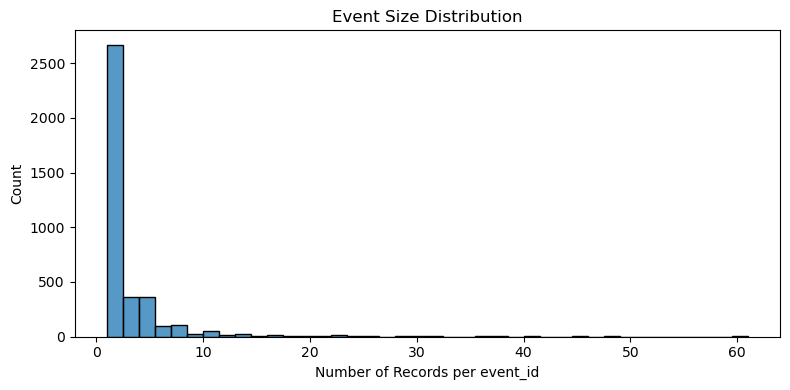

In [27]:
event_counts = df.groupby("event_id").size()
plt.figure(figsize=(8, 4))
sns.histplot(event_counts, bins=40, kde=False)
plt.title("Event Size Distribution")
plt.xlabel("Number of Records per event_id")
plt.tight_layout()
plt.show()
### data is very sparse and has an obvious long-tail structure

In [28]:
df['event_id'].value_counts().value_counts()

count
1     1887
2      780
3      361
4      206
5      155
6      101
8       57
7       48
10      29
9       27
11      20
12      18
14      13
23       8
13       8
15       6
16       6
21       5
19       5
17       4
18       3
22       2
25       2
28       2
29       2
45       2
48       1
20       1
24       1
30       1
32       1
36       1
37       1
40       1
61       1
Name: count, dtype: int64

## 3. create_at

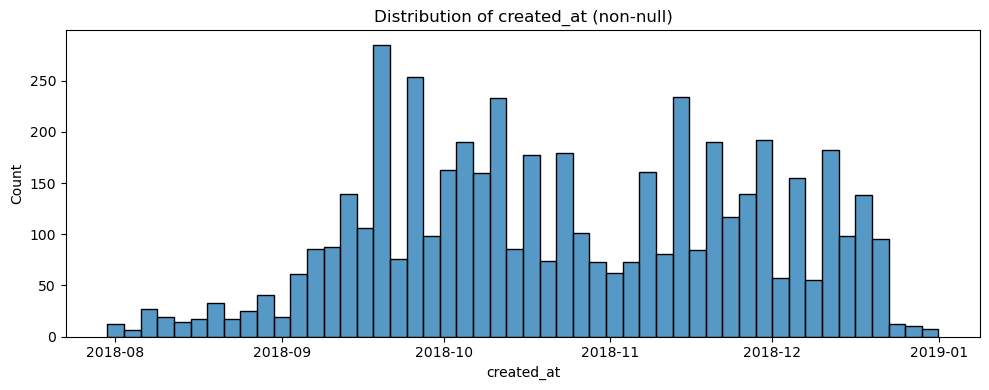

In [26]:
df_time = df[df['created_at'].notna()]
plt.figure(figsize=(10, 4))
sns.histplot(df_time['created_at'], bins=50, kde=False)
plt.title("Distribution of created_at (non-null)")
plt.xlabel("created_at")
plt.tight_layout()
plt.show()

## 4. participant_id

In [29]:
event_per_user = df.groupby("participant_id")["event_id"].nunique()
event_per_user.describe()
# > 75% participate only attend event once


count    9321.000000
mean        1.036906
std         0.223920
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: event_id, dtype: float64

In [35]:
record_per_user = df["participant_id"].value_counts()
record_per_user.describe()

count    9321.000000
mean        1.083575
std         0.322260
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: count, dtype: float64

<AxesSubplot:title={'center':'Top 10 Active Participants'}, xlabel='participant_id'>

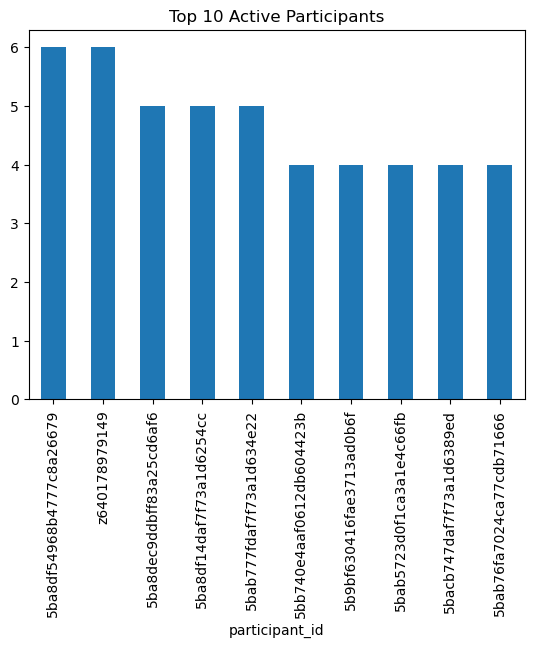

In [37]:
top_users = record_per_user .head(10)
top_users.plot(kind='bar', title="Top 10 Active Participants")


## 5. object_id

In [40]:
object_counts = df['object_id'].value_counts()
object_counts.describe()


count    8180.000000
mean        1.234719
std         0.691886
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        22.000000
Name: count, dtype: float64

In [44]:
object_user_counts = df.groupby("object_id")["participant_id"].nunique()
object_user_counts.describe()

count    8180.000000
mean        1.219560
std         0.656368
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        19.000000
Name: participant_id, dtype: float64

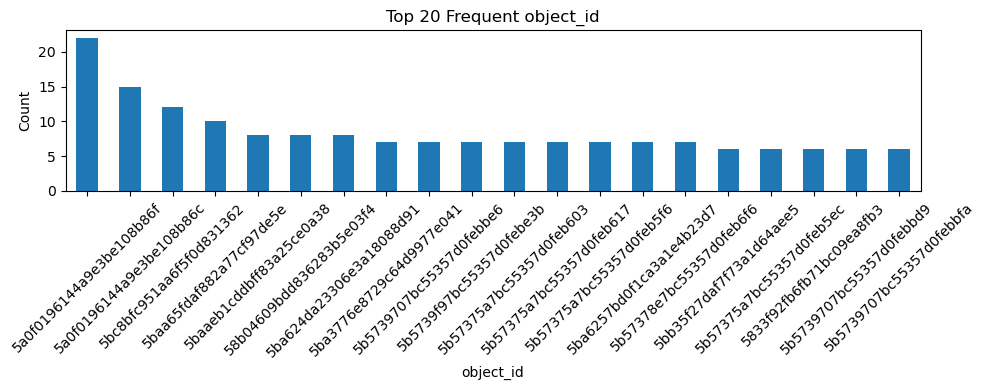

In [42]:
plt.figure(figsize=(10, 4))
df['object_id'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Frequent object_id")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
